## Import and Read data

In [16]:
#Viewing Accident.csv
ACCIDENT= pd.read_csv('~\ACCIDENT\ACCIDENT.csv')
ACCIDENT_LOCATION = pd.read_csv('~\ACCIDENT\ACCIDENT_LOCATION.csv')
NODE = pd.read_csv(r'~\ACCIDENT\NODE.csv')
ACCIDENTplusACCIDENT_LOCATION = pd.merge(ACCIDENT, ACCIDENT_LOCATION, on = "ACCIDENT_NO")
ACCIDENTplusACCIDENT_LOCATIONplusNODE = pd.merge(ACCIDENTplusACCIDENT_LOCATION, NODE, on = "ACCIDENT_NO")
ACCIDENT_final = ACCIDENTplusACCIDENT_LOCATIONplusNODE
ACCIDENT_final.shape

(188599, 49)

In [25]:
ACCIDENT_final = ACCIDENT_final[ACCIDENT_final['Deg Urban Name'] != 'MELB_URBAN']
ACCIDENT_final = ACCIDENT_final[ACCIDENT_final['Deg Urban Name'] != 'MELBOURNE_CBD']
ACCIDENT_final.to_csv("ACCIDENT_final.csv", encoding="utf-8", index = False)

In [26]:
print(ACCIDENT_final.columns)

Index(['ACCIDENT_NO', 'ACCIDENTDATE', 'ACCIDENTTIME', 'ACCIDENT_TYPE',
       'Accident Type Desc', 'DAY_OF_WEEK', 'Day Week Description', 'DCA_CODE',
       'DCA Description', 'DIRECTORY', 'EDITION', 'PAGE', 'GRID_REFERENCE_X',
       'GRID_REFERENCE_Y', 'LIGHT_CONDITION', 'Light Condition Desc',
       'NODE_ID_x', 'NO_OF_VEHICLES', 'NO_PERSONS', 'NO_PERSONS_INJ_2',
       'NO_PERSONS_INJ_3', 'NO_PERSONS_KILLED', 'NO_PERSONS_NOT_INJ',
       'POLICE_ATTEND', 'ROAD_GEOMETRY', 'Road Geometry Desc', 'SEVERITY',
       'SPEED_ZONE', 'NODE_ID_y', 'ROAD_ROUTE_1', 'ROAD_NAME', 'ROAD_TYPE',
       'ROAD_NAME_INT', 'ROAD_TYPE_INT', 'DISTANCE_LOCATION',
       'DIRECTION_LOCATION', 'NEAREST_KM_POST', 'OFF_ROAD_LOCATION', 'NODE_ID',
       'NODE_TYPE', 'AMG_X', 'AMG_Y', 'LGA_NAME', 'Lga Name All',
       'Region Name', 'Deg Urban Name', 'Lat', 'Long', 'Postcode No'],
      dtype='object')


## Extract subset with useful fields

In [28]:
ACCIDENT_final_1 = ACCIDENT_final[['ACCIDENT_NO', 'ACCIDENTDATE', 'ACCIDENTTIME', 'ROAD_NAME', 'ROAD_TYPE', 'AMG_X', 'AMG_Y', 'LGA_NAME', 'Lat', 'Long', 'Postcode No', 'SEVERITY']
]
ACCIDENT_final_1.head()

,ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,ROAD_NAME,ROAD_TYPE,AMG_X,AMG_Y,LGA_NAME,Lat,Long,Postcode No,SEVERITY
2,T20060000022,14/01/2006,12:10:00,BROWNS,ROAD,2487321.693,2345019.925,MORNINGTON PENINSULA,NaN,NaN,3939,2
6,T20060000035,15/01/2006,10:55:00,PRINCES,HIGHWAY,2579241.448,2372064.763,BAW BAW,NaN,NaN,3820,2
13,T20060000094,17/01/2006,15:55:00,MIRBOO NORTH-TRAFALGAR,ROAD,2601540.338,2363475.691,BAW BAW,-1.00000,-1.00000,3824,2
16,T20060000105,17/01/2006,18:30:00,OLD MOOROODUC,ROAD,2505513.564,2357254.803,MORNINGTON PENINSULA,-1.00000,-1.00000,3915,3
22,T20060000130,17/01/2006,18:13:00,GREAT ALPINE,ROAD,2733176.496,2406985.338,EAST GIPPSLAND,-37.80884,147.64839,3875,2


## Drop nulls

In [34]:
ACCIDENT_final_2 = ACCIDENT_final_1.dropna()
ACCIDENT_final_2.head()
ACCIDENT_final_2.shape

(42081, 12)

## Plot on map

In [54]:
import geopandas as gpd
import shapefile as shp
from shapely.geometry.polygon import Polygon
from shapely.geometry.point import Point
import zipfile
import matplotlib.pyplot as plt
import descartes
suburbsZip = zipfile.ZipFile('vic_state_polygon_shp-gda2020.zip')
suburbsZip.extractall() #extract files
#suburbSf = shp.Reader('VIC_STATE_POLYGON_shp')
suburbSf = gpd.read_file('VIC_STATE_POLYGON_shp.shp')

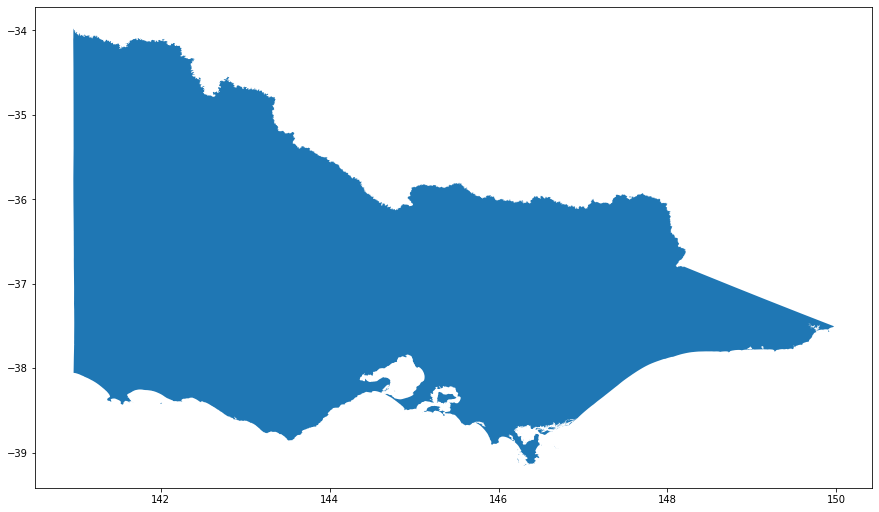

In [85]:
%matplotlib inline
fig,ax = plt.subplots(figsize =(15,15))
suburbSf.plot(ax=ax)

In [73]:
sf = shp.Reader('VIC_STATE_POLYGON_shp.shp')
len(sf.shapes())
#sf.records()
sf.records()[1][0]

'12486'

## Importing Shapefile

In [87]:
# import libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt# import street map
street_map = gpd.read_file('VIC_STATE_POLYGON_shp.shp')

## Creating GeoPandas DataFrame

In [166]:
# designate coordinate system
crs = {'init' :'EPSG:32733'}# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(ACCIDENT_final_2['Long'], ACCIDENT_final_2['Lat'])]# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(ACCIDENT_final_2, crs = crs,geometry = geometry)
geo_df.head()

,ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,ROAD_NAME,ROAD_TYPE,AMG_X,AMG_Y,LGA_NAME,Lat,Long,Postcode No,SEVERITY,geometry
13,T20060000094,17/01/2006,15:55:00,MIRBOO NORTH-TRAFALGAR,ROAD,2601540.338,2363475.691,BAW BAW,-1.00000,-1.00000,3824,2,POINT (-1 -1)
16,T20060000105,17/01/2006,18:30:00,OLD MOOROODUC,ROAD,2505513.564,2357254.803,MORNINGTON PENINSULA,-1.00000,-1.00000,3915,3,POINT (-1 -1)
22,T20060000130,17/01/2006,18:13:00,GREAT ALPINE,ROAD,2733176.496,2406985.338,EAST GIPPSLAND,-37.80884,147.64839,3875,2,POINT (147.64839 -37.80884)
23,T20060000132,17/01/2006,19:00:00,OMEO,HIGHWAY,2720173.508,2502235.790,EAST GIPPSLAND,-1.00000,-1.00000,3898,2,POINT (-1 -1)
27,T20060000141,19/01/2006,01:10:00,CHURCHILL,ROAD,2624030.818,2362141.303,LATROBE,-38.23387,146.41658,3840,2,POINT (146.41658 -38.23387)


## Plot accidents on the shapefile

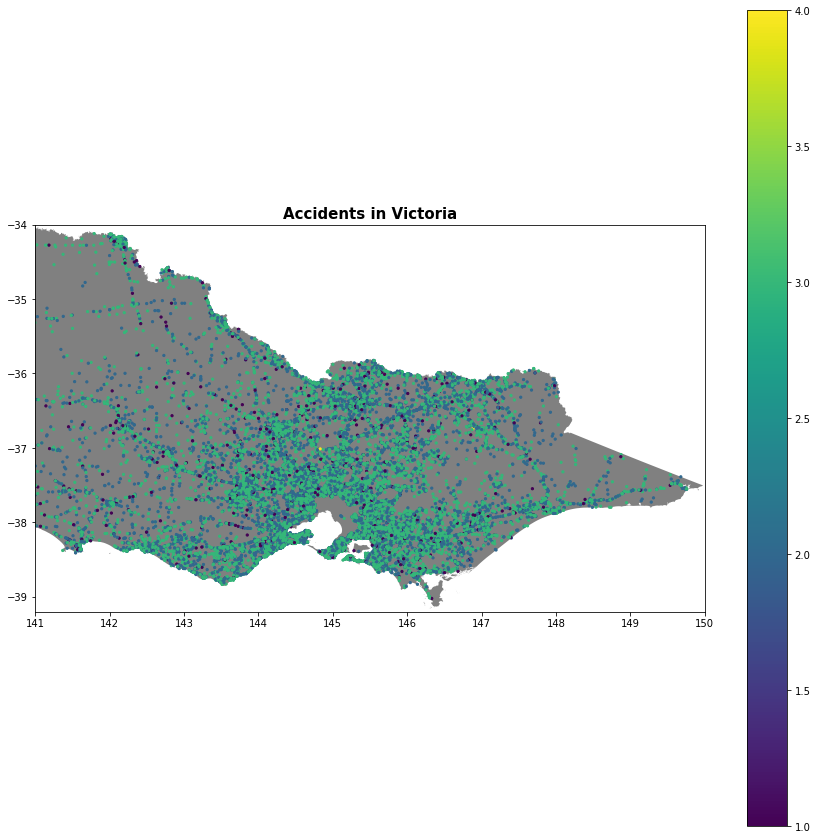

In [170]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=1,color='grey')# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column='SEVERITY',ax=ax,alpha=1, legend=True,markersize=5)# add title to graph
plt.title('Accidents in Victoria', fontsize=15,fontweight='bold')# set latitiude and longitude boundaries for map display
plt.xlim(141,150)
plt.ylim(-39.2,-34)
# show map
plt.show()